# How well do jobs and skills pay for Data Analysts?

#### Methodology

1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\User\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# filter for the job titles and country
df_GER = df[(df['job_country'] == 'Germany')].dropna(subset=['salary_year_avg'])

In [5]:
job_titles = df_GER['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist']

In [6]:
df_GER_top6 = df_GER[df_GER['job_title_short'].isin(job_titles)]

In [13]:
job_order = df_GER_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

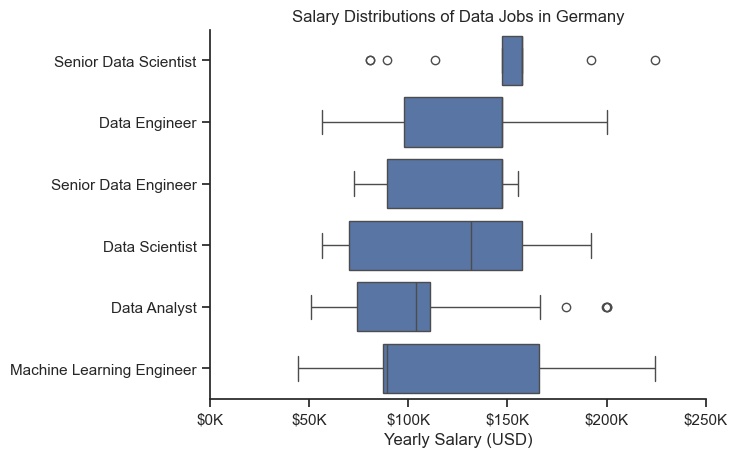

In [14]:
sns.boxplot(data=df_GER_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in Germany')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 250000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Investigate Median Salary VS Skill for Data Analysts

In [19]:
df_DA_GER = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Germany')].copy()

df_DA_GER = df_DA_GER.dropna(subset=['salary_year_avg'])

In [20]:
df_DA_GER =df_DA_GER.explode('job_skills')

df_DA_GER[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
20066,75067.5,r
20066,75067.5,python
20066,75067.5,java
20066,75067.5,c#
20066,75067.5,sql


In [32]:
df_DA_top_pay = df_DA_GER.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay =df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
github,3,199675.0
terraform,1,166419.5
bigquery,1,166419.5
redshift,1,166419.5
nosql,1,166419.5
kafka,1,166419.5
gcp,3,165000.0
javascript,1,111175.0
terminal,1,111175.0


In [31]:
df_DA_skills = df_DA_GER.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending= False)

df_DA_skills

,count,median
job_skills,,
python,18,111175.0
spark,7,111175.0
pandas,4,108412.5
excel,7,105650.0
sql,24,101500.0
tableau,13,100500.0
power bi,4,83937.5
r,7,75067.5
looker,5,53014.0


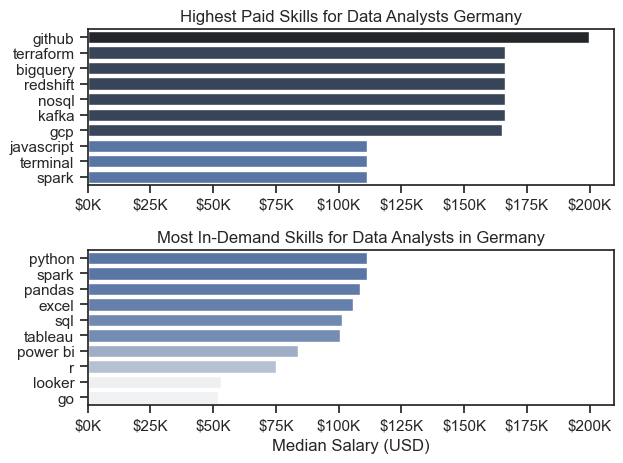

In [34]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts Germany')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in Germany')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()